# Logistic Regression

**Import Libraires**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.set_style('whitegrid')

In [3]:
train = pd.read_csv('titanic_train-Copy1.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking Info and null values**

In [5]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Lets check the null values by heatmap**

# Every yellow color/line shows that there is a null value in that column


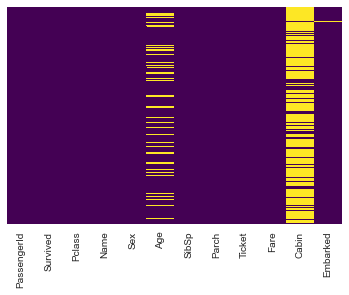

In [8]:
sn.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
print ('# Every yellow color/line shows that there is a null value in that column')

<AxesSubplot:xlabel='Survived', ylabel='count'>

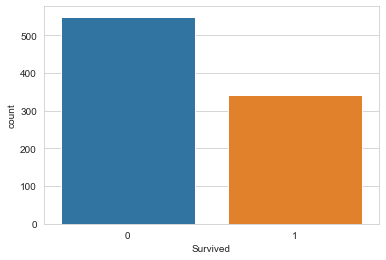

In [9]:
sn.countplot(x = 'Survived', data = train)
# 0 are the pepole that didn't survived
# 1 are the pepole that survived

In the above plot we saw the number of survivers and non survivers. In the below section we will see that the more died pepole are male and more survived pepole are females.

<AxesSubplot:xlabel='Survived', ylabel='count'>

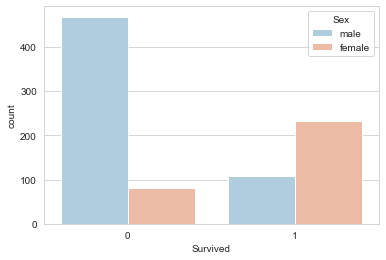

In [10]:
sn.countplot(x = 'Survived', data = train, hue ='Sex', palette='RdBu_r')

In the following graph we will see that the most died passengers were of third class i.e. the lower class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

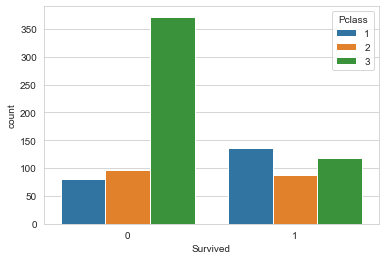

In [11]:
sn.countplot(x = 'Survived', hue = 'Pclass', data = train)

G:\Anaconda 2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

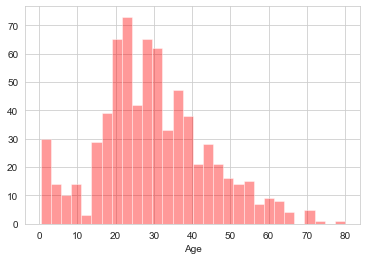

In [12]:
sn.distplot(train['Age'].dropna(), kde = False, color = 'red', bins = 30)

above graph shows that the average age is between 20 to 40. Few are between 0 and 10, and very few are above 50.

<AxesSubplot:ylabel='Frequency'>

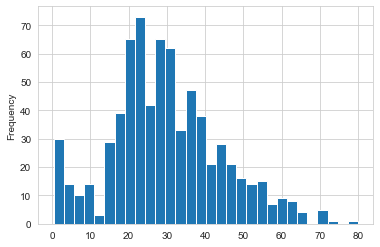

In [13]:
train['Age'].plot.hist(bins = 30)
# pandas builtin visulization library

<AxesSubplot:xlabel='SibSp', ylabel='count'>

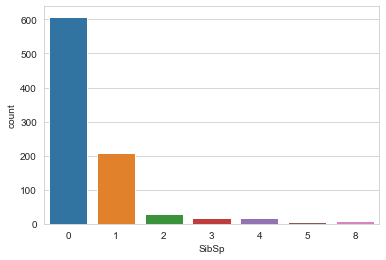

In [14]:
sn.countplot(x = 'SibSp', data = train)

0(1st bar) shows that the most pepole were single i.e. they didn't have any child, parent or sppouse. Second bar shows that few people have only single reletive i.e. only parents or just a wife etc.

<AxesSubplot:>

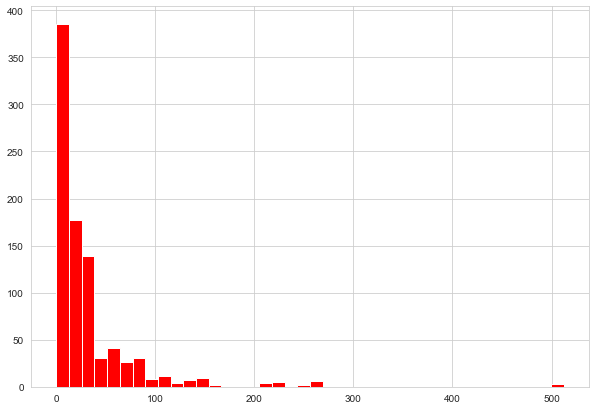

In [15]:
train['Fare'].hist(bins = 40, color = 'red', figsize=(10,7))
# most pepole were travelling in third class

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train['Fare'].iplot(kind = 'hist', bins = 40, color = 'green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

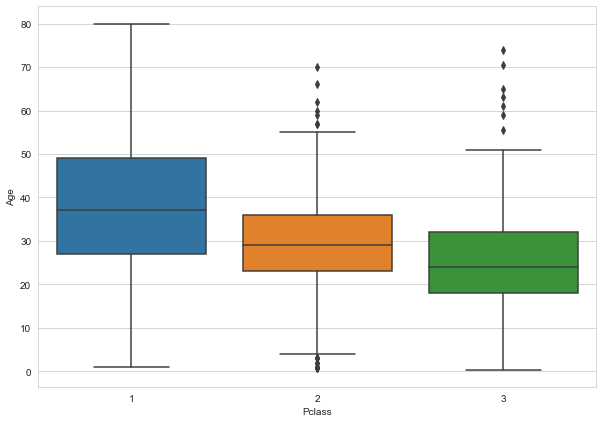

In [19]:
plt.figure(figsize=(10,7))
sn.boxplot(x = 'Pclass', y = 'Age', data = train)

First box shows that the average age of first class passengers is between 30 and 50, average age of second class passengers is between 25 and 35, average age of third class passengers is between 18 and 32. It means the old pepole prefer first class.

Now we are going to fill the NaN values of **Age** column oon the basis of above graph.

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):    # See if any null value in 
                        
        if Pclass == 1:   # If corresponding Class in 1 than fill by 37 (average age of that class)
            return 37
        elif Pclass == 2: # If corresponding Class in 2 than fill by 29 (average age of that class)
            return 29
        else:
            return 24     # If corresponding Class in 3 than fill by 24 (average age of that class)
    else:
        return Age
         
    

In [21]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

**Let us check again by ploting that if any nan value is in Age column or not**

<AxesSubplot:>

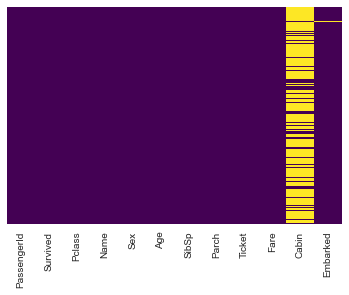

In [22]:
sn.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now there is no Missing value in Age column. But there are many missing values still in **Cabin column**. So we will drop this column bcz thi is not usefull for us.

In [23]:
train.drop('Cabin', axis = 1, inplace = True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


There is only a single missing value in **Embarked column**. So we drop the complete row.

In [25]:
train.dropna(inplace = True)

Now let us check again by visulization.

<AxesSubplot:>

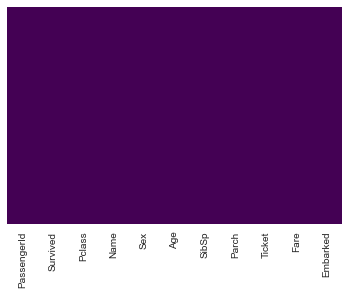

In [27]:
sn.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

Now our data is almost ready for training.

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
pd.get_dummies(train['Sex'])
# if its zero in first row then its mean there is no female, there is only male and vise versa

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


 In above data frame there are two columns which can confuse our model. So we do another thing
 to drop a column.

In [33]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


**1** means that there is male in the column. **0** means that male is not in column.

In [34]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [35]:
train = pd.concat([train, sex, embarked], axis = 1)

In [38]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


Now we are going to drop extra columns that are no longer useful for us

In [39]:
train.drop (['Name', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Passengerid is also not useful for us. se remove it as well

In [42]:
train.drop('PassengerId', axis = 1, inplace = True)

In [43]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [44]:
data = train.drop('Survived', axis = 1)
target = train[['Survived']]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=101) 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()

In [50]:
logmodel.fit(X_train, y_train)

G:\Anaconda 2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

G:\Anaconda 2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [51]:
logmodel.score(X_test, y_test)

0.8202247191011236

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.66      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [55]:
cm = confusion_matrix(y_test, predictions)

In [56]:
cm

array([[99,  8],
       [24, 47]], dtype=int64)

Text(0.5, 1.0, 'Confusion_Metrics')

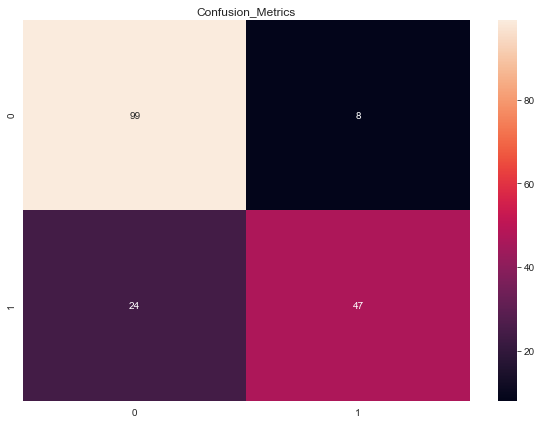

In [57]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.title('Confusion_Metrics')

In [58]:
logmodel.coef_

array([[-1.08049430e+00, -3.27517875e-02, -2.68609608e-01,
        -1.11258934e-01,  1.32728206e-03, -2.52167335e+00,
         3.15535629e-01, -2.52396458e-01]])

In [59]:
logmodel.intercept_

array([4.69240502])